# 🥕 Ingredient Counter with YOLOv8

Detect ingredients in an image and count how many of each are present. Bounding boxes are used internally by YOLOv8, but only the counts per ingredient are returned.

## 1. Install Dependencies

In [1]:
!pip install ultralytics opencv-python matplotlib

## 2. Import Libraries

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

## 3. Load Image

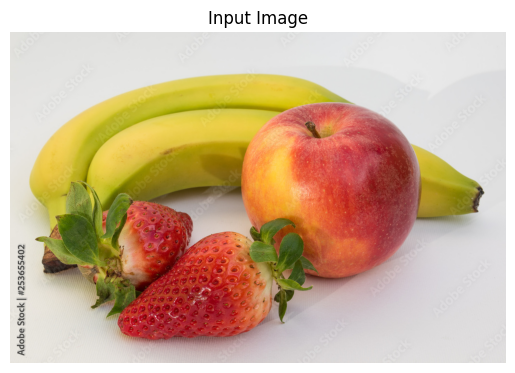

In [3]:
image_path = "C:/Users/Anadu/Downloads/test_food.jpg"  # replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Input Image")
plt.axis("off")
plt.show()

## 4. Load YOLOv8 Model

In [4]:
model = YOLO("../models/yolov8x.pt")  # or your own trained model like 'models/best.pt'

## 5. Run Inference and Count Ingredients

In [5]:
results = model(image_rgb)

# Count detections
detections = results[0]
names = detections.names
counts = {}

for box in detections.boxes:
    cls_id = int(box.cls[0])
    cls_name = names[cls_id]
    counts[cls_name] = counts.get(cls_name, 0) + 1

print("🍽️ Ingredient Counts:")
for ingredient, count in counts.items():
    print(f"{ingredient}: {count}")


0: 448x640 2 bananas, 1 apple, 613.6ms
Speed: 4.9ms preprocess, 613.6ms inference, 8.5ms postprocess per image at shape (1, 3, 448, 640)
🍽️ Ingredient Counts:
apple: 1
banana: 2


## 6. Optional: Show Annotated Image

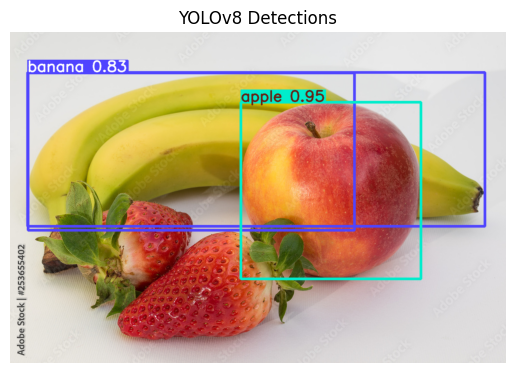

In [7]:
annotated_image = detections.plot()
plt.imshow(annotated_image)
plt.title("YOLOv8 Detections")
plt.axis("off")
plt.show()

## Done